In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk


General Education Courses Distribution:
English Composition & Comprehension Lab - Credit Hours: 1
Islamic Studies & Ethics - Credit Hours: 3
English Composition & Comprehension - Credit Hours: 3
Pakistan Studies - Credit Hours: 3
Communication & Presentation Skills - Credit Hours: 3
Technical & Business Writing - Credit Hours: 3
Introduction to Info. & Comm. Technologies - Credit Hours: 3
Total Credit Hours Cleared in General Education: 19

University Elective Courses Distribution:
Social Science Related - Credit Hours: 3
Economy Related - Credit Hours: 3
Management Related - Credit Hours: 3
Management Related - Credit Hours: 3
Total Credit Hours Cleared in University Elective: 12

Mathematics and Science Foundation Courses Distribution:
Applied Physics - Credit Hours: 3
Calculus & Analytical Geometry - Credit Hours: 3
Linear Algebra - Credit Hours: 3
Probability & Statistics - Credit Hours: 4
Total Credit Hours Cleared in Mathematics and Science Foundation: 13

Computer Science Core 

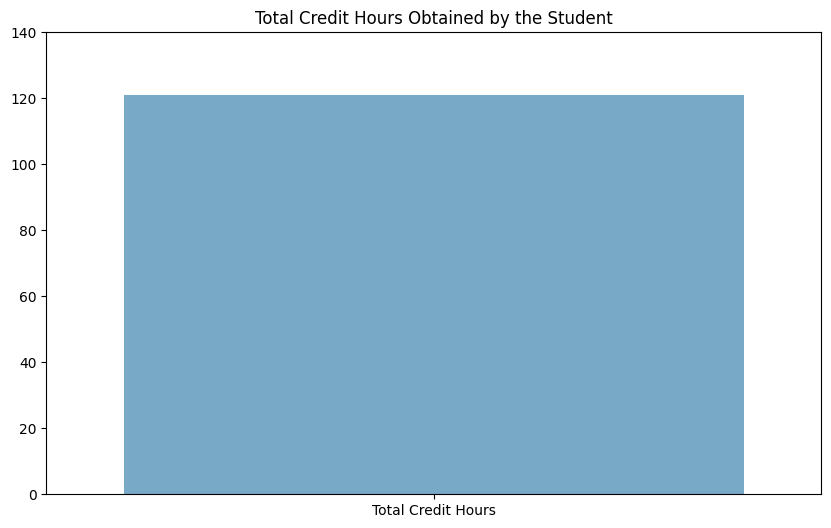

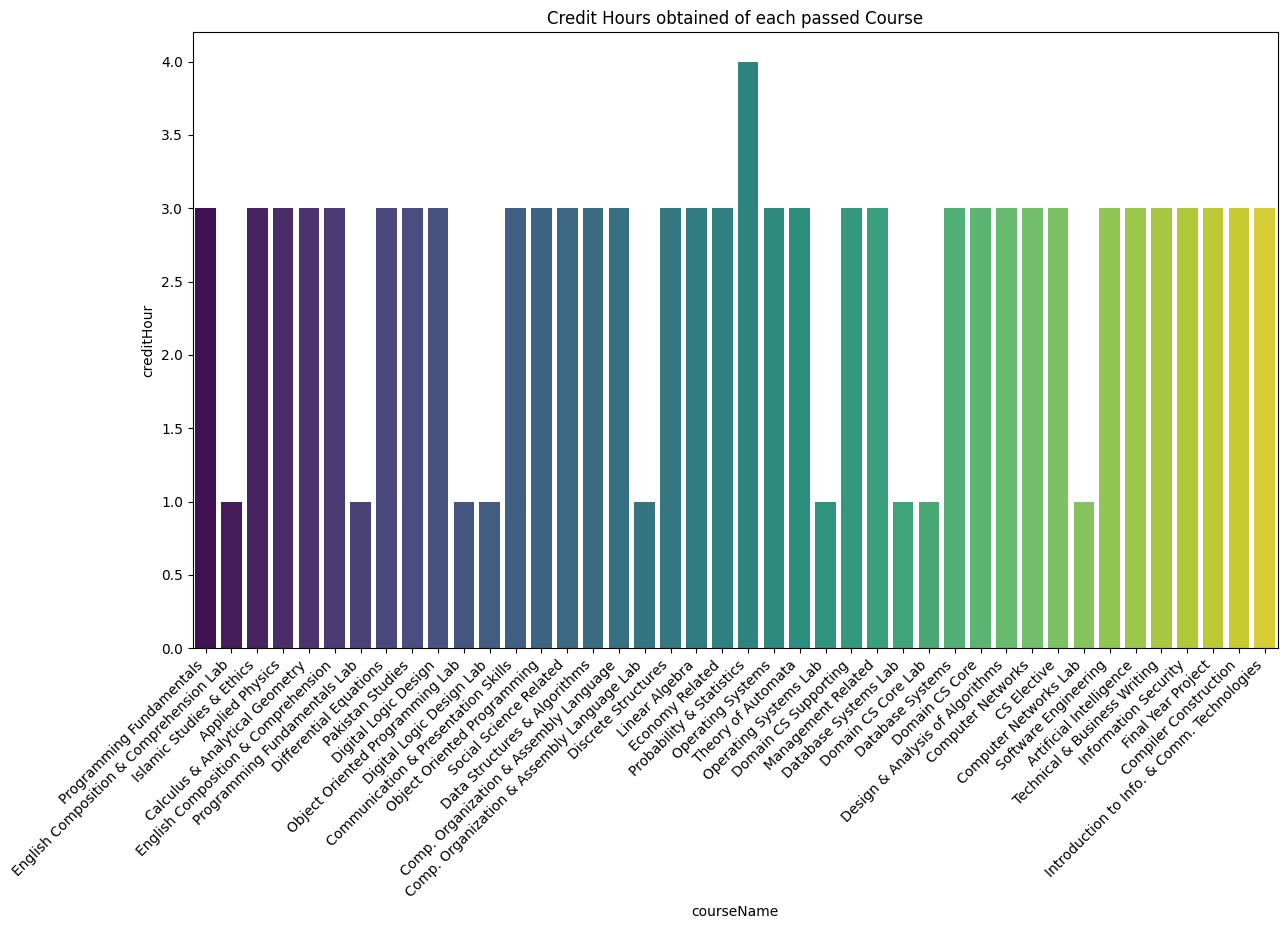

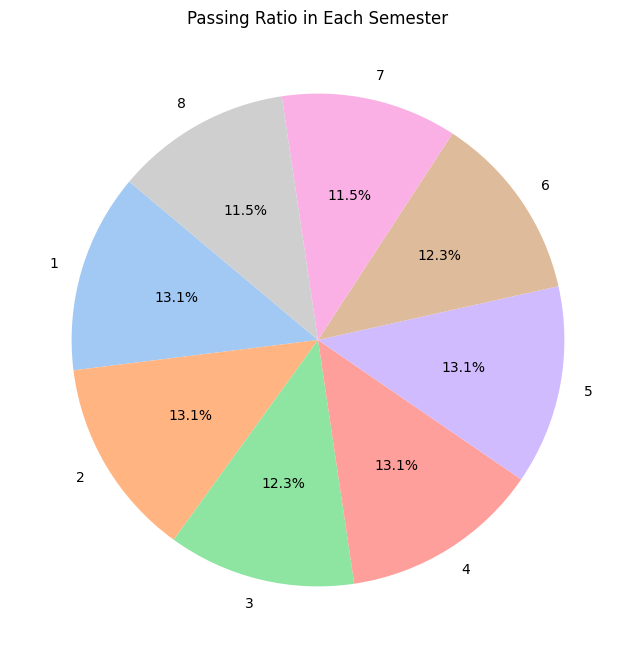

In [2]:
# Defining course groups
course_groups = {
       "General Education": ["English Composition & Comprehension", "English Composition & Comprehension Lab", 
                          "Technical & Business Writing", "Communication & Presentation Skills", "Professional Practices", 
                          "Introduction to Info. & Comm. Technologies", "Pakistan Studies", "Islamic Studies & Ethics"],
    "University Elective": ["Foreign Language", "Social Service", "Management Related", "Social Science Related", "Economy Related"],
    "Mathematics and Science Foundation": ["Calculus & Analytical Geometry", "Probability & Statistics", 
                                           "Linear Algebra", "Applied Physics"],
    "Computer Science Core": ["Programming Fundamentals", "Programming Fundamentals Lab", "Object Oriented Programming", 
                              "Object Oriented Programming Lab", "Data Structures & Algorithms", "Operating Systems",
                              "Operating Systems Lab", "Database Systems", "Database Systems Lab", "Compiler Construction", 
                              "Comp. Organization & Assembly Language", "Comp. Organization & Assembly Language Lab", 
                              "Software Engineering", "Computer Networks", "Information Security",
                              "Digital Logic Design", "Digital Logic Design Lab", "Design & Analysis of Algorithms", 
                              "Parallel and Distributed Computing", "Artificial Intelligence", "Theory of Automata"],
    "Computer Science Supporting": ["Differential Equations", "Multi Variable Calculus", "Graph Theory", "Theory of Programming Languages", "Numerical Computing"],
    "Computer Science Elective": ["CS Elective"]
}

def show_message(message, font_size):
    root = tk.Tk()
    label = tk.Label(root, text=message, font=("Century Gothic", font_size))
    label.pack()
    root.mainloop()

def verify_hec_requirements(file_path, pre_req_path):
    student_df = pd.read_csv(r'C:/Users/kk/OneDrive/Desktop/UNIVERSITY/FIFTH SEMESTER/KRR/PROJECT/Test Std-0101.csv')
    pre_req_df = pd.read_csv(r'C:/Users/kk/OneDrive/Desktop/UNIVERSITY/FIFTH SEMESTER/KRR/PROJECT/Std-Courses 1.csv')
    total_crd_hrs_criteria = 130
    pre_req_clear = True

    for course_name in student_df['courseName'].unique():
        if not check_pre_req(student_df, pre_req_df, course_name):
            pre_req_clear = False
            break

    if pre_req_clear:
        messages = "All Pre-Reqs Cleared\n"
    else:
        messages = "All Pre-Reqs Not Cleared\n"

    student_crd_hrs = count_credit_hrs(student_df)

    if student_crd_hrs >= total_crd_hrs_criteria:
        messages += f"Total Credit Hours obtained: {student_crd_hrs}\n"
        messages += f"Total Credit Hours missing: {total_crd_hrs_criteria - student_crd_hrs}\n"
        messages += "Student has passed and achieved degree\n"
    else:
        messages += f"Total Credit Hours obtained: {student_crd_hrs}\n"
        messages += f"Total Credit Hours missing: {total_crd_hrs_criteria - student_crd_hrs}\n"
        messages += "Student has failed to achieve degree\n"
        messages += "\nCourses due to which degree got stopped:\n"
        for index, row in student_df.iterrows():
            if row['points'] == 0:
                messages += f"{row['courseName']} - Credit Hours: {row['creditHour']}, Type: {row['type']}\n"

    show_message(messages, 24)
    
    # Displaying distribution of cleared courses by group
    for group, courses in course_groups.items():
        cleared_courses = student_df[(student_df['courseName'].isin(courses)) & (student_df['creditHour'] > 0)]
        total_cleared_credit_hours = cleared_courses['creditHour'].sum()
        print(f"\n{group} Courses Distribution:")
        for index, row in cleared_courses.iterrows():
            print(f"{row['courseName']} - Credit Hours: {row['creditHour']}")
        print(f"Total Credit Hours Cleared in {group}: {total_cleared_credit_hours}")

    # Bar Plot for Total Credit Hours
    plt.figure(figsize=(10, 6))
    sns.barplot(x=["Total Credit Hours"], y=[student_crd_hrs], palette="Blues")
    plt.title("Total Credit Hours Obtained by the Student")
    plt.ylim(0, 140) 
    plt.show()
    
    # Bar Plot for All Courses and Their Credit Hours
    plt.figure(figsize=(14, 8))
    sns.barplot(x="courseName", y="creditHour", data=student_df, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title("Credit Hours obtained of each passed Course")
    plt.show()
    print("")
    print("")
    print("")
    
    # Pie Chart for Passed Courses in Each Semester
    passed_semesters = student_df[student_df['creditHour'] > 0].groupby('semester')['creditHour'].sum()
    plt.figure(figsize=(10, 8))
    plt.pie(passed_semesters, labels=passed_semesters.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Passing Ratio in Each Semester")
    plt.show()

def count_credit_hrs(student_data):
    student_crd_count = 0

    for index, row in student_data.iterrows():
        if 'lab' in row['courseName'].lower():
            theory_course = row['courseName'].replace(' Lab', '')
            theory_course_rows = student_data[(student_data['courseName'] == theory_course) & (student_data['points'] >= 1)]
            lab_course_rows = student_data[(student_data['courseName'] == row['courseName']) & (student_data['points'] >= 1)]

            if not theory_course_rows.empty and not lab_course_rows.empty:
                student_crd_count += lab_course_rows['creditHour'].values[0]
            elif not theory_course_rows.empty:
                student_crd_count += theory_course_rows['creditHour'].values[0]
        else:
            if row['points'] >= 1:
                student_crd_count += row['creditHour']

    return student_crd_count

def check_pre_req(student_df, pre_req_df, course_name):
    pre_req_course_df = pre_req_df[pre_req_df['courseName'] == course_name]['Pre-Requisite']

    if pre_req_course_df.empty or pre_req_course_df.values[0] == 'None':
        return True

    pre_req_course = pre_req_course_df.values[0]
    pre_req_passed = student_df[(student_df['courseName'] == pre_req_course) & (student_df['points'] >= 1)]

    if pre_req_passed['points'].empty or pre_req_passed['points'].iloc[0] < 1:
        return False

    return check_pre_req(student_df, pre_req_df, pre_req_course)

file_path = "Std-0101.csv"
pre_req_path = "Std-Courses 1.csv"

verify_hec_requirements(file_path, pre_req_path)
